In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('./D9x.csv',  index_col=None)
# data = pd.read_csv('./IntE_terms_for_Reweighting.csv',  index_col=None)



def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


In [3]:
data

,System,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,WT-Ca,-1950.9,-25.9,732.3,15.6,-1228.9,710000.0
1,D9M-Nd,-3807.2,42.4,721.5,37.2,-3006.1,1460.0
2,D9H-Nd,-3842.6,43.4,754.4,39.7,-3005.1,2150.0
3,D9A-Nd,-3798.1,44.4,723.2,37.2,-2993.3,397.0
4,D9N-Nd,-3839.3,44.8,655.2,38.4,-3100.9,53.1
5,WT-Nd,-3339.8,38.9,730.1,36.7,-2534.1,5.3


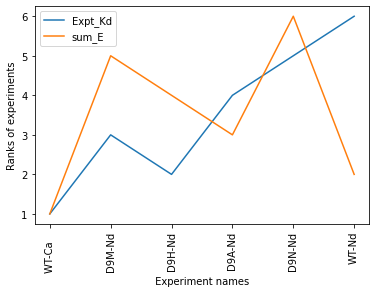

In [4]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = [i+1 for i in range(len(y1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel('Ranks of experiments')
plt.xlabel(' Experiment names ')
plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(['Expt_Kd','sum_E'])

In [5]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 3, 2, 4, 5, 6]


In [6]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[-1950.9,   -25.9,   732.3,    15.6],
       [-3807.2,    42.4,   721.5,    37.2],
       [-3842.6,    43.4,   754.4,    39.7],
       [-3798.1,    44.4,   723.2,    37.2],
       [-3839.3,    44.8,   655.2,    38.4],
       [-3339.8,    38.9,   730.1,    36.7]])

In [7]:
list_ = indexify(data['sum_E'])

print(list_)

[1, 5, 4, 3, 6, 2]


In [8]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [9]:
frac = np.linspace(0,1,11)
mult = np.linspace(2,10,9)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [10]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1
                if counter % 100000 == 0:
                    print('done: ', counter)


c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


done:  100000


In [11]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [12]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')
main_data

,w1,w2,w3,w4,sum
31206,0.3,9.0,0.0,0.6,-0.942857
14412,0.1,7.0,0.0,3.0,-0.942857
14411,0.1,7.0,0.0,2.0,-0.942857
13611,0.1,5.0,0.0,2.0,-0.942857
13612,0.1,5.0,0.0,3.0,-0.942857
...,...,...,...,...,...
28725,0.3,2.0,7.0,0.5,0.600000
28726,0.3,2.0,7.0,0.6,0.600000
28719,0.3,2.0,6.0,10.0,0.600000
24780,0.3,0.1,10.0,0.0,0.600000


In [13]:
main_data = main_data[main_data['sum'] >= sum_calc_easy([1,1,1,1], kd_rank, data_4)]
main_data

,w1,w2,w3,w4,sum
99471,3.0,0.8,4.0,2.0,0.257143
99470,3.0,0.8,4.0,1.0,0.257143
117499,5.0,4.0,5.0,10.0,0.257143
13163,0.1,3.0,9.0,0.3,0.257143
117497,5.0,4.0,5.0,8.0,0.257143
...,...,...,...,...,...
28724,0.3,2.0,7.0,0.4,0.600000
28725,0.3,2.0,7.0,0.5,0.600000
28726,0.3,2.0,7.0,0.6,0.600000
28719,0.3,2.0,6.0,10.0,0.600000


In [14]:
# import matplotlib.pyplot as plt
# plt.plot([x+1 for x in range(len(sorted_dataframe['sum']))], sorted_dataframe['sum'])

In [15]:
weights = main_data[main_data['sum']==max(list(main_data['sum']))]
weights = np.array(weights)[-1][:-1]
weights

array([ 0.3,  0.1, 10. ,  0. ])

In [16]:
max(list(main_data['sum']))

0.6

In [17]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-1]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [18]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [19]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,WT-Ca,1,1,1
2,D9H-Nd,2,4,2
1,D9M-Nd,3,5,5
3,D9A-Nd,4,3,4
4,D9N-Nd,5,6,6
5,WT-Nd,6,2,3


In [20]:
print(kd_rank)

print(sum_wE)
print(np.corrcoef(kd_list,sum_wE)[1][0])

print('----------------------')


print(kd_list)
print(sum_E)
print(np.corrcoef(kd_list,sum_E)[1][0])

[1, 3, 2, 4, 5, 6]
[1, 5, 2, 4, 6, 3]
0.6
----------------------
[1, 3, 2, 4, 5, 6]
[1, 5, 4, 3, 6, 2]
0.2571428571428572


Text(0.5, 0, '\nexperiments\n')

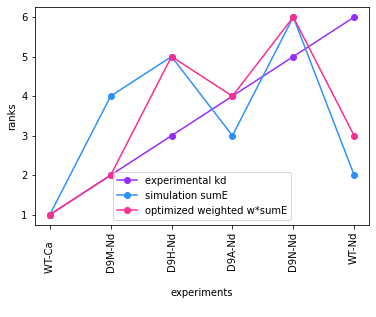

In [21]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], color = '#962ef9', marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = '#2e91f9', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = '#f92e91', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)
# plt.plot(x1,y1,color = '#91f92e', marker = 'o')
# plt.plot(x2,y2,color='#962ef9', marker = 's')
# plt.plot(x3,y3,color ='#2e91f9', marker = '>')
# plt.plot(x4,y4, color = '#f92e91',marker = '*')
plt.ylabel('ranks')
plt.legend(['experimental kd','simulation sumE', 'optimized weighted w*sumE'])
plt.xlabel('\nexperiments\n')


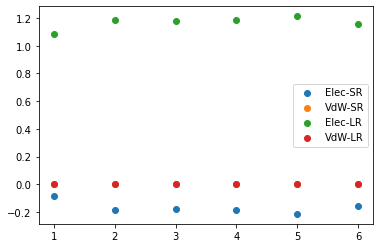

In [22]:
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])

frac_es = [system[i]['frac_contribution'][0] for i in system.keys()]
frac_vs = [system[i]['frac_contribution'][1] for i in system.keys()]
frac_el = [system[i]['frac_contribution'][2] for i in system.keys()]
frac_vl = [system[i]['frac_contribution'][3] for i in system.keys()]
x_frac = [i+1 for i in range(len(frac_es))]


plt.scatter(x_frac,frac_es)
plt.scatter(x_frac,frac_vs)
plt.scatter(x_frac,frac_el)
plt.scatter(x_frac,frac_vl)
# plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(["Elec-SR","VdW-SR","Elec-LR","VdW-LR"])

In [23]:
def log_finder(array):
    import math
    out = []
    for i in array:
        if i == 0:
            out.append(0)
        else:
            out.append(math.log10(i))

    out[0] = 0

    return out

In [24]:
main_data

,w1,w2,w3,w4,sum
99471,3.0,0.8,4.0,2.0,0.257143
99470,3.0,0.8,4.0,1.0,0.257143
117499,5.0,4.0,5.0,10.0,0.257143
13163,0.1,3.0,9.0,0.3,0.257143
117497,5.0,4.0,5.0,8.0,0.257143
...,...,...,...,...,...
28724,0.3,2.0,7.0,0.4,0.600000
28725,0.3,2.0,7.0,0.5,0.600000
28726,0.3,2.0,7.0,0.6,0.600000
28719,0.3,2.0,6.0,10.0,0.600000


Text(0, 0.5, 'log (10 base) weights (w)')

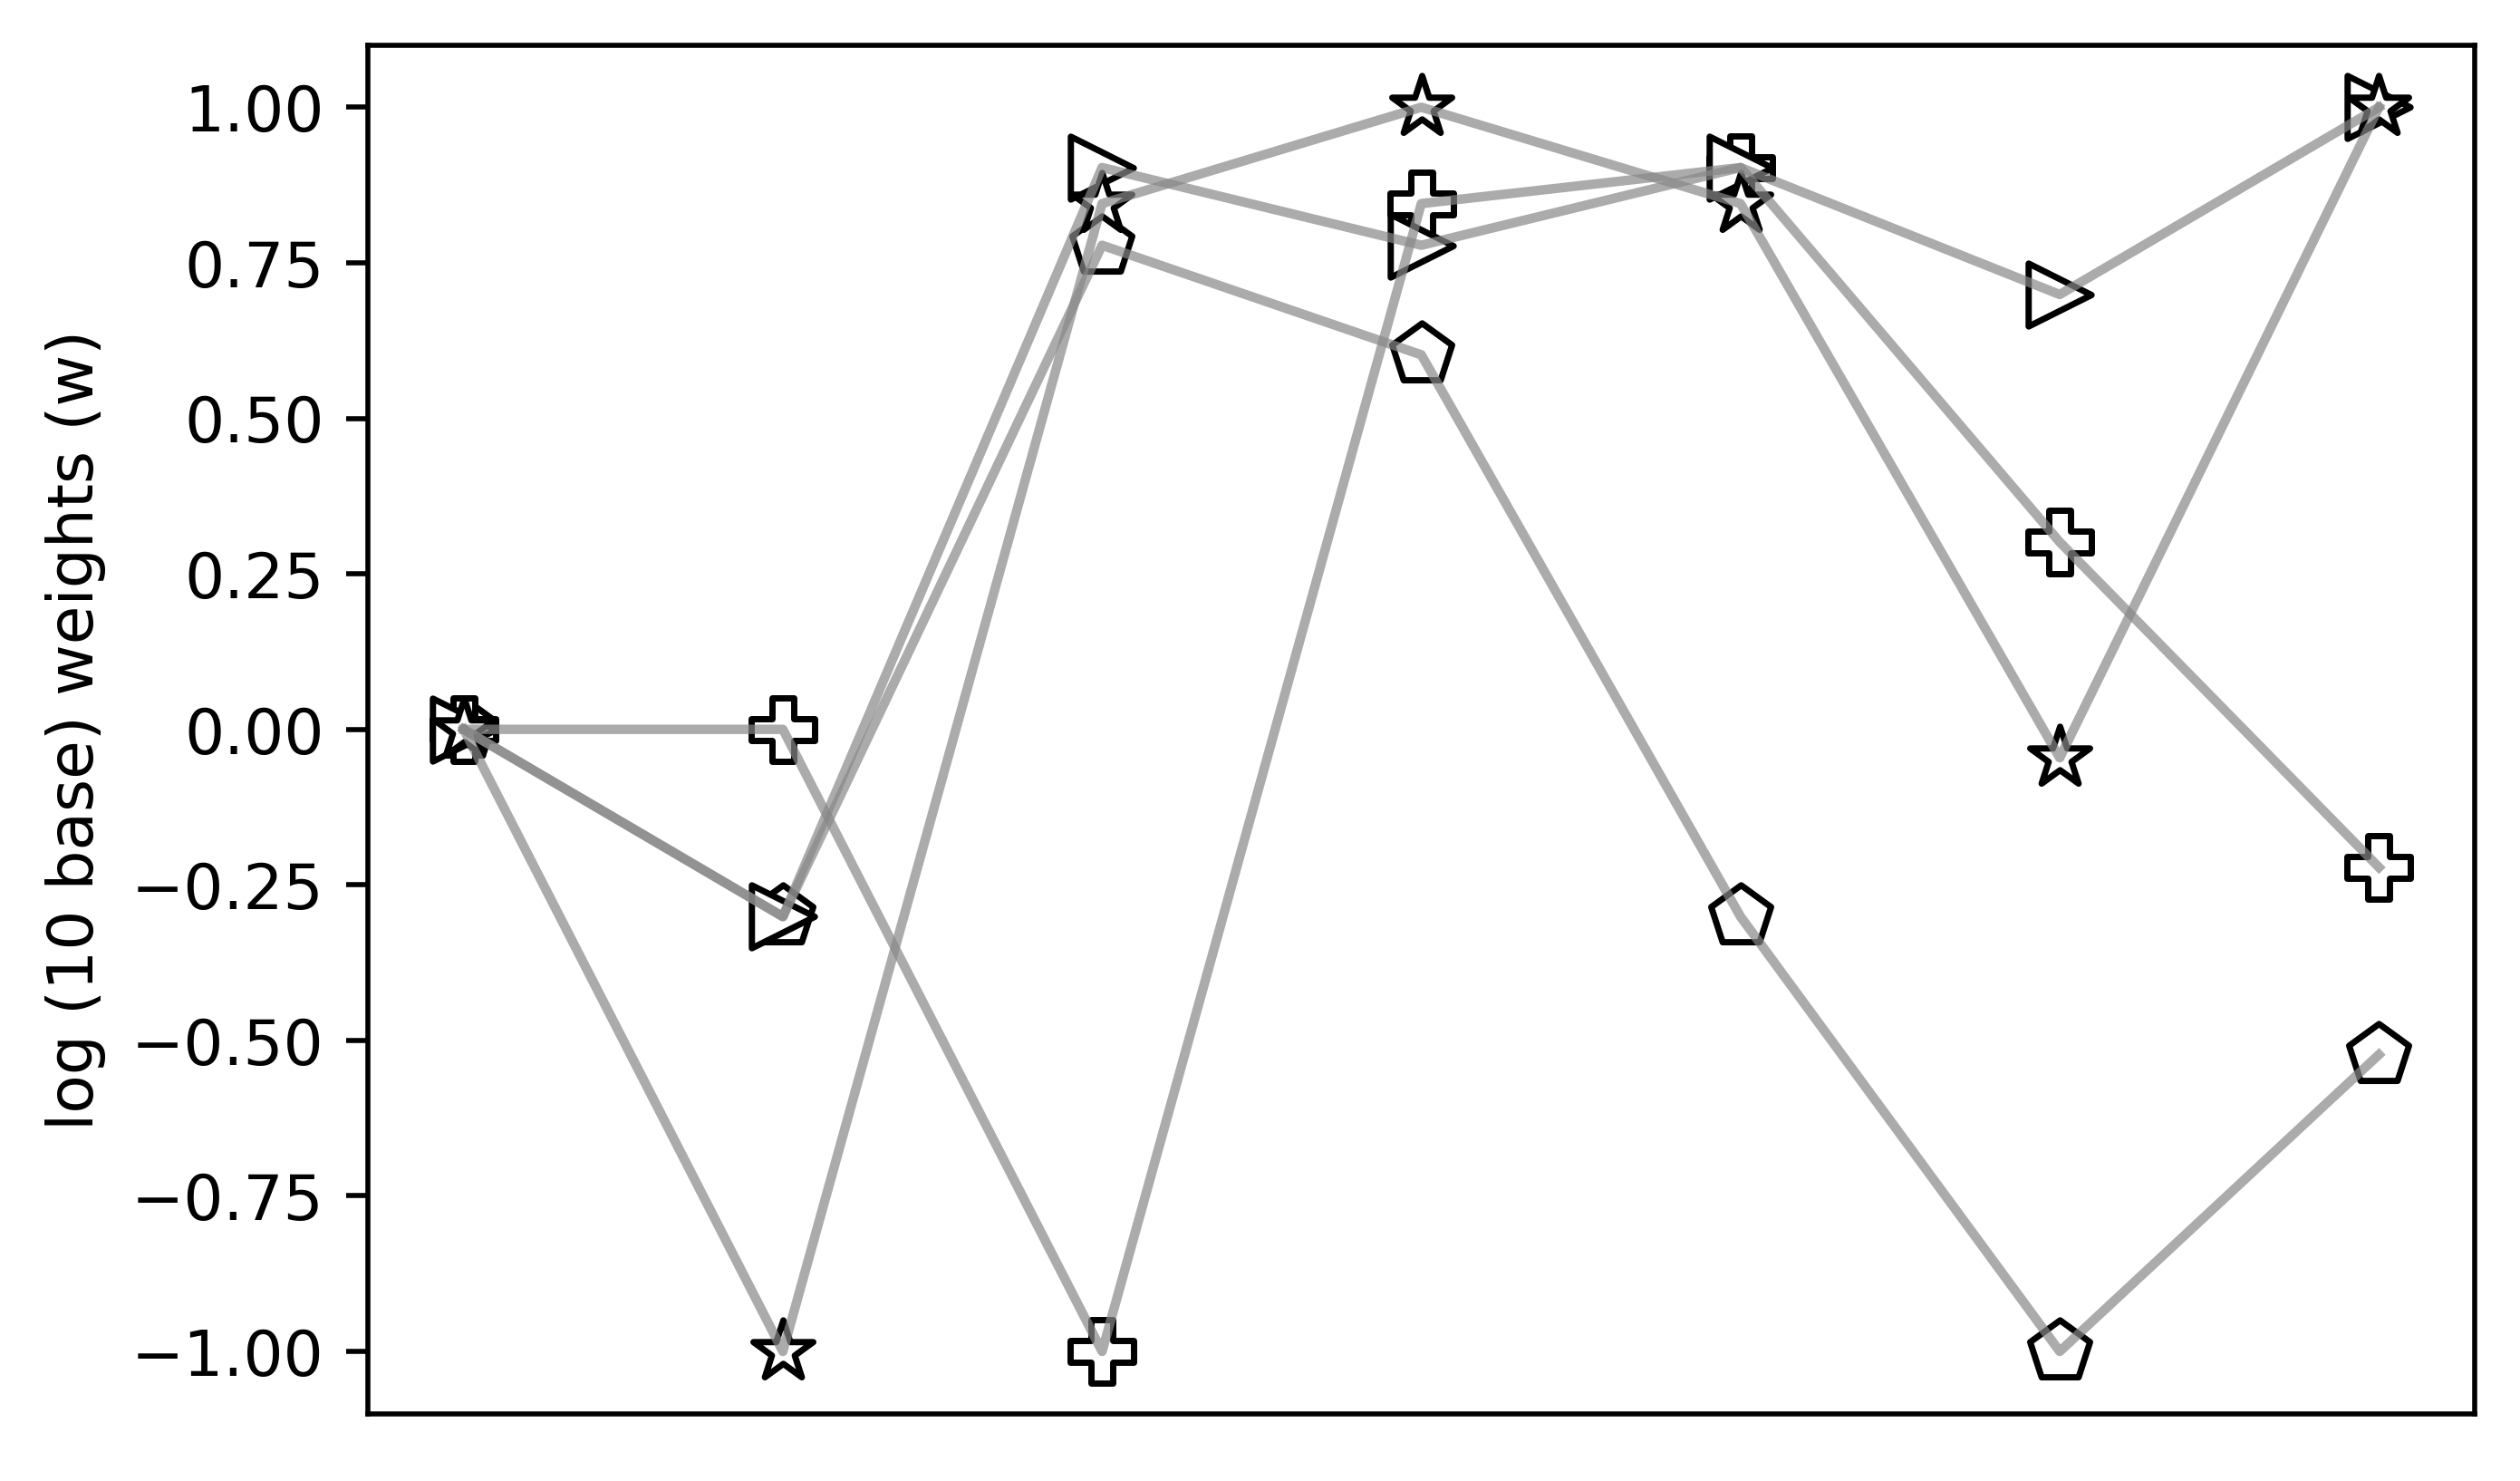

In [25]:
import seaborn as sns
import math

sorted_dataframe = main_data[(main_data != 0).all(1)].drop_duplicates('sum',keep='first')

plt.figure(dpi=500)

y1 = log_finder(sorted_dataframe['w1'])
y2 = log_finder(sorted_dataframe['w2'])
y3 = log_finder(sorted_dataframe['w3'])
y4 = log_finder(sorted_dataframe['w4'])


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([-2,11])
# plt.xlim([0,145])


# plt.scatter(x1,y1,color = '#91f92e', marker = 'o')
# plt.scatter(x2,y2,color='#962ef9', marker = 's')
# plt.scatter(x3,y3,color ='#2e91f9', marker = '>')
# plt.scatter(x4,y4, color = '#f92e91',marker = '*')
plt.plot(x1,y1,color = '#888888', alpha = .7)
plt.plot(x2,y2,color = '#888888', alpha = .7)
plt.plot(x3,y3,color = '#888888', alpha = .7)
plt.plot(x4,y4,color = '#888888', alpha = .7)
plt.scatter(x1,y1, marker = 'p', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x2,y2, marker = 'P', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x3,y3, marker = '>', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x4,y4, marker = '*', s = 100, facecolors = 'w', edgecolors='k', lw = 1)


plt.xticks([])

plt.ylabel('log (10 base) weights (w)')
# plt.legend(['w1','w2','w3','w4'])



In [26]:
sorted_dataframe

,w1,w2,w3,w4,sum
99471,3.0,0.8,4.0,2.0,0.257143
44101,0.5,1.0,0.5,0.1,0.305234
120756,6.0,0.1,8.0,7.0,0.344502
110719,4.0,7.0,6.0,10.0,0.371429
47156,0.5,8.0,8.0,7.0,0.434928
12689,0.1,2.0,5.0,0.9,0.542857
26799,0.3,0.6,10.0,10.0,0.600000


In [27]:
initial = -.5
final = 1

In [28]:
d9x_new = [0.2571428571428572,0.3714285714285715,0.4285714285714286,0.4593354014105716,0.48571428571428577,0.5494209261006238]

          0         1         2         3         4         5
0  0.504762  0.580952  0.619048  0.639557  0.657143  0.699614


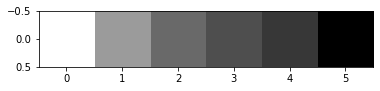

In [29]:
colors = pd.DataFrame([((i-initial)/(final-initial)) for i in d9x_new]).T
print(colors)
plt.imshow(colors, cmap='binary')
labels = sorted_dataframe['sum'].values

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

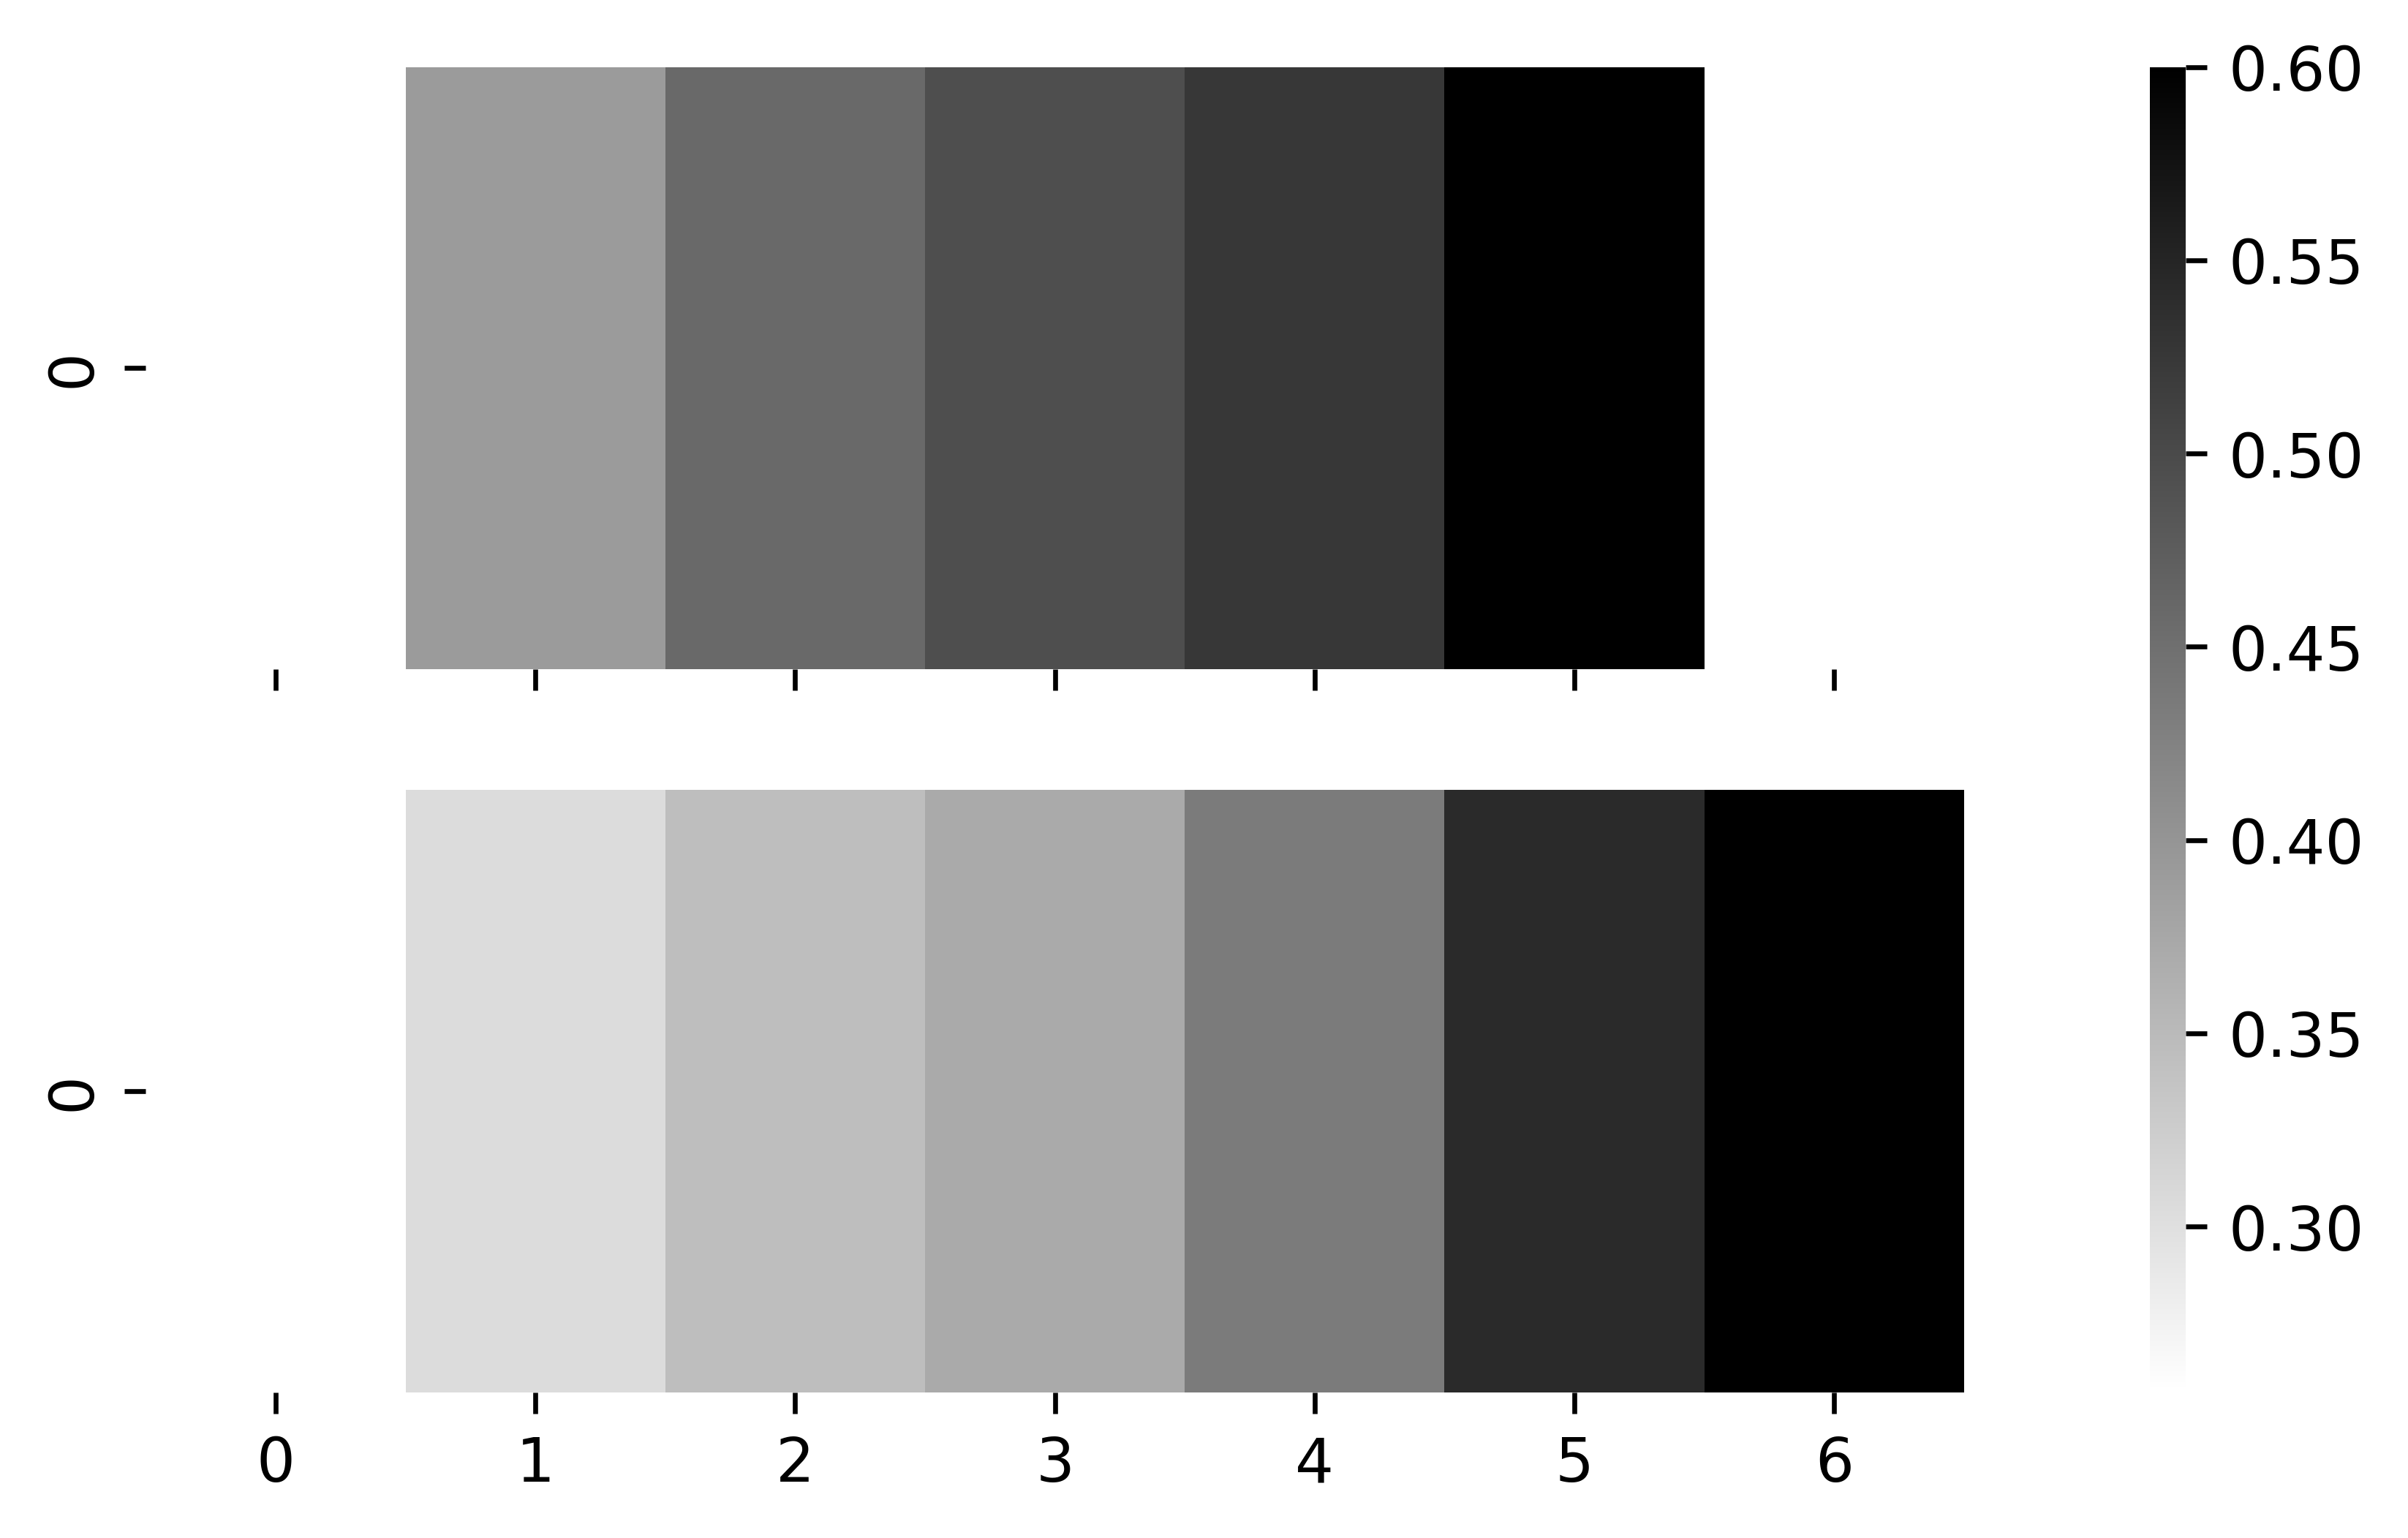

In [30]:
import matplotlib.gridspec as gs
import numpy as np
import math

site = np.array([d9x_new])
country = np.array([sorted_dataframe['sum']])
# total = np.zeros((1,24))
# total[:,0:6] = site[0]
# total[:,6:] = country[0]

# country = total
# np.array(math.log10(i) for i in total[0])

fig = plt.figure(dpi=600)
N_rows_site, _ = site.shape
N_rows_country, _ = country.shape

grid=gs.GridSpec(2,2, height_ratios=[N_rows_site,N_rows_country], width_ratios=[50,1])

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0], sharex=ax1)
cax = fig.add_subplot(grid[:,1])

sns.heatmap(site, cmap="binary", ax=ax1, cbar_ax=cax)
sns.heatmap(country, cmap="binary", ax=ax2, cbar_ax=cax)



plt.setp(ax1.get_xticklabels(), visible=False)

          0         1         2         3         4         5    6
0  0.257143  0.305234  0.344502  0.371429  0.434928  0.542857  0.6


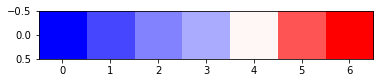

In [31]:
colors = pd.DataFrame(country)
print(colors)
plt.imshow(colors, cmap='bwr')
labels = country

# plt.xticks(ticks = [i for i in range(len(labels))],labels = labels, rotation = 'vertical')
# xx, locs = plt.xticks()
# ll = ['%.3f' % a for a in labels]
# plt.xticks(xx, ll)
# plt.yticks([])
# plt.xlabel('\ncorrelation co-efficient')

In [32]:
[i for i in country[0]]

[0.2571428571428572,
 0.30523384783367985,
 0.3445015510579288,
 0.3714285714285715,
 0.4349282257756499,
 0.5428571428571429,
 0.6]

In [33]:
math.log10(.01)

-2.0